![olympics](https://images.unsplash.com/photo-1569517282132-25d22f4573e6?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=833&q=80)

# **Table of content**
* [1. Gender EDA](#1)
* [2. Athletes EDA](#2)
* [3. Teams EDA](#3)
* [4. Medals EDA](#4)
* [5. Work in progress](#5)
<a id='0'></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# **Details**

This contains the details of over `11,000 athletes`, with `47 disciplines`, along with `743 Teams` taking part in the 2021(2020) Tokyo Olympics.\
This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender.\
It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [2]:
%%bash
pip install openpyxl

# **Task**
<h4>EDA on Countries participated, disciplines, events & coaches.</h4>

In [3]:
gender = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx')
athletes = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx')
teams = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx')
coaches = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx')
medals = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx')

# **1. Gender EDA**
* `Artistic Swimming` and `Rhythmic Gymnastics` has no male Participants.
* Max number of participants is in the `Athletics` Discipline. **`Male: 1072 & Female: 969`**
* The least number of participants is in the `Cycling BMX Freestyle` Discipline. **`Male: 9 & Female: 10`**

<a id='1'></a>
* [Jump top](#0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


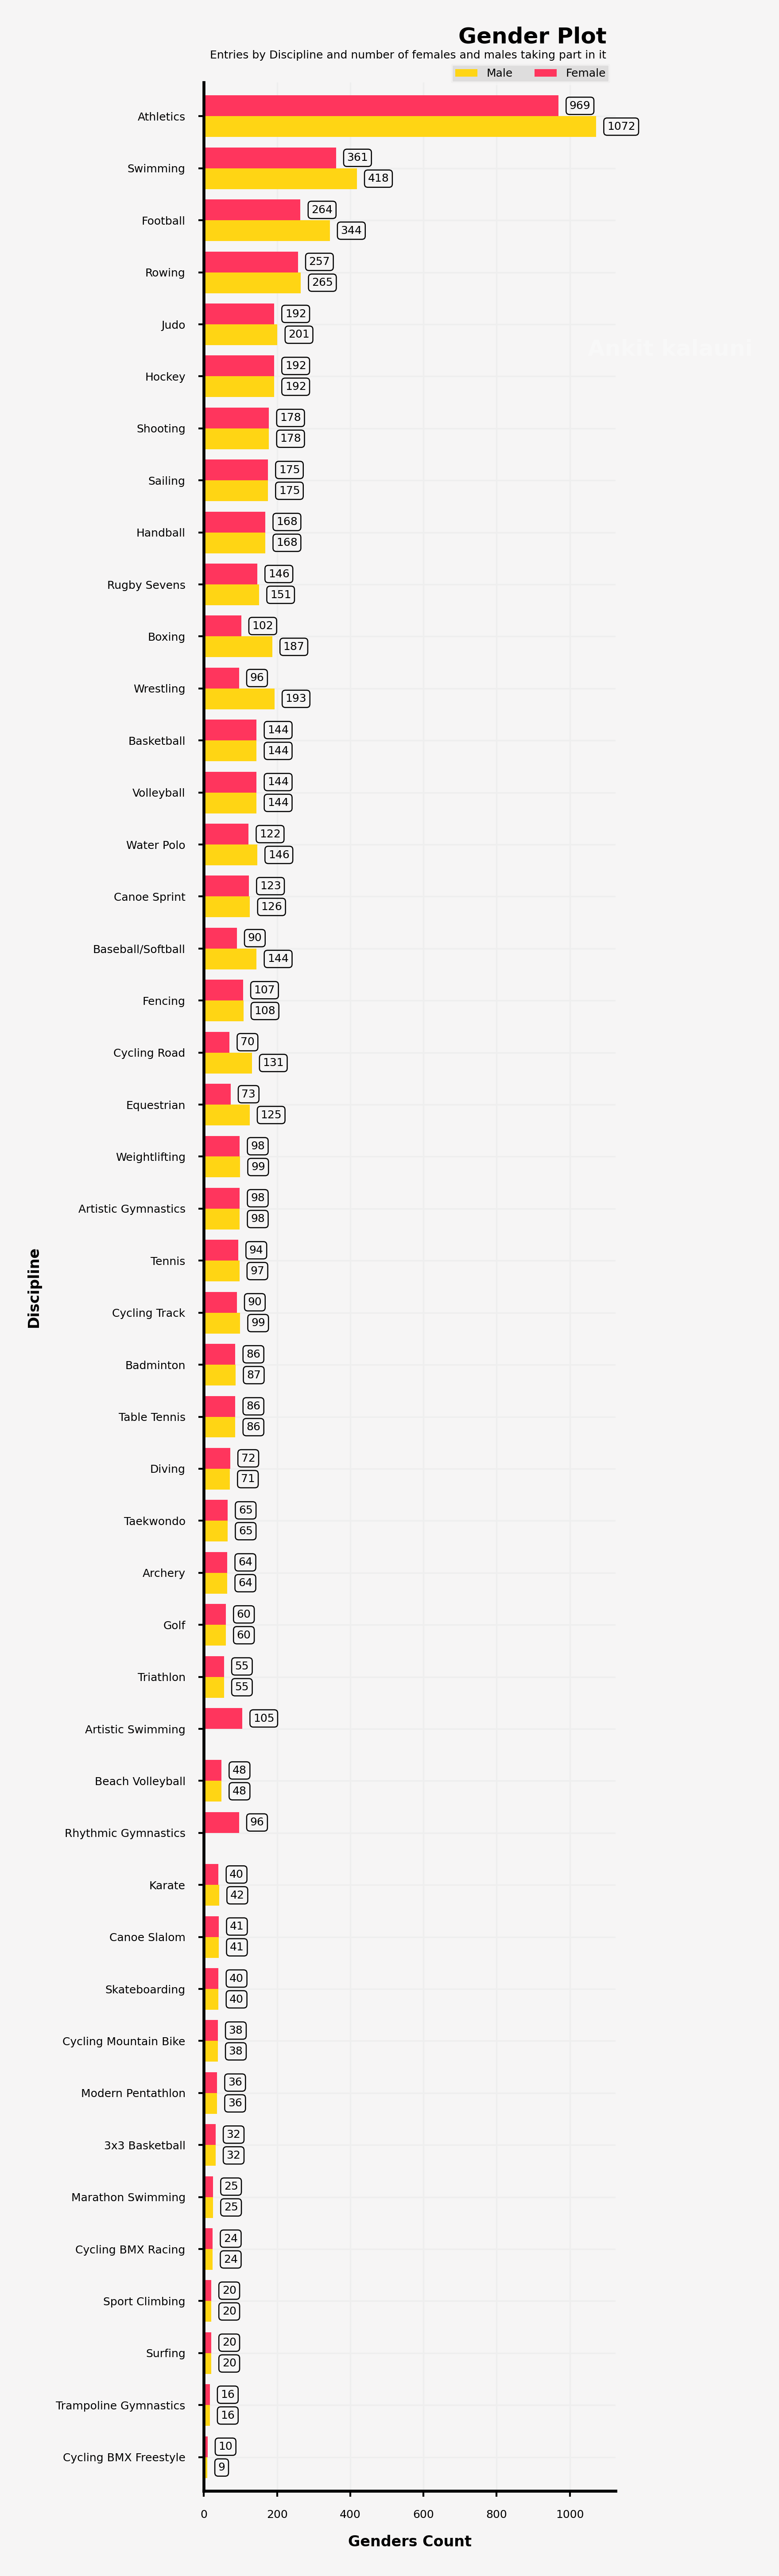

In [4]:
# gender.head(10)
#gender.shape #(46, 4)
gender.info()
gender.describe().T

gender.sort_values(by='Total',inplace=True)

# Gender barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514','#ff355d'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = gender.plot(x='Discipline',y=['Male','Female'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Genders Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male', 'Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.01), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 30
                y = p.get_y() + p.get_height() / 2 
                ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


ax0_sns.text(1100,46.4, f'Gender Plot', fontsize=6, weight='bold',ha='right')
ax0.text(1100, 46.11,f'Entries by Discipline and number of females and males taking part in it',fontsize=3,ha='right')
ax0_sns.text(1500,40.4, f'Ankit kalauni', fontsize=6, weight='bold',ha='right',color='w',alpha=0.3) #ignore this line if you reading this

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# **2. Athletes EDA**
* The maximum number of Athletes is from the `United States of America`.
* The minimum number of Athletes is from `South Sudan`, along with 15 more countries where only 2 Athletes participated.
<a id='2'></a>
* [Jump top](#0)

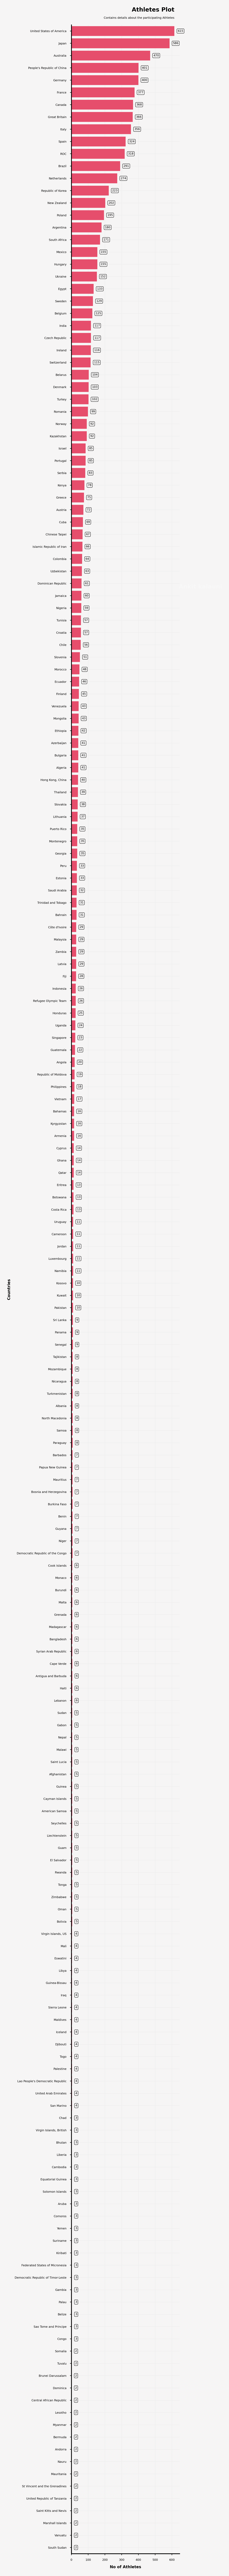

In [5]:
# athletes.head(10)
#athletes.shape #(11085, 3)
# athletes.info()
# athletes.describe().T
# athletes.sort_values(by='Total',inplace=True)
y = athletes.NOC.value_counts().index
x = athletes.NOC.value_counts().values

# Athletes barplot with Discipline
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,48), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=athletes,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Athletes',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Countries',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(ncol=4, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.005), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 20
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Athletes Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')

ax0_sns.text(900,45.4, f'Ankit kalauni',alpha=0.3, fontsize=6, weight='bold',ha='right',color='w') #ignore this line if you reading this



ax0_sns.text(615,-1.6, f'Athletes Plot', fontsize=6, weight='bold',ha='right')
ax0.text(615,-1,f'Contains details about the participating Athletes',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# **3. Teams EDA**
* There are 113 Countries in the `Swimming` Discipline. which is the maximum number of country participation.
* There are 12 Countries in `Baseball/Softball` Discipline. which is the minimum number of country participation.

<a id='3'></a>
* [Jump top](#0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


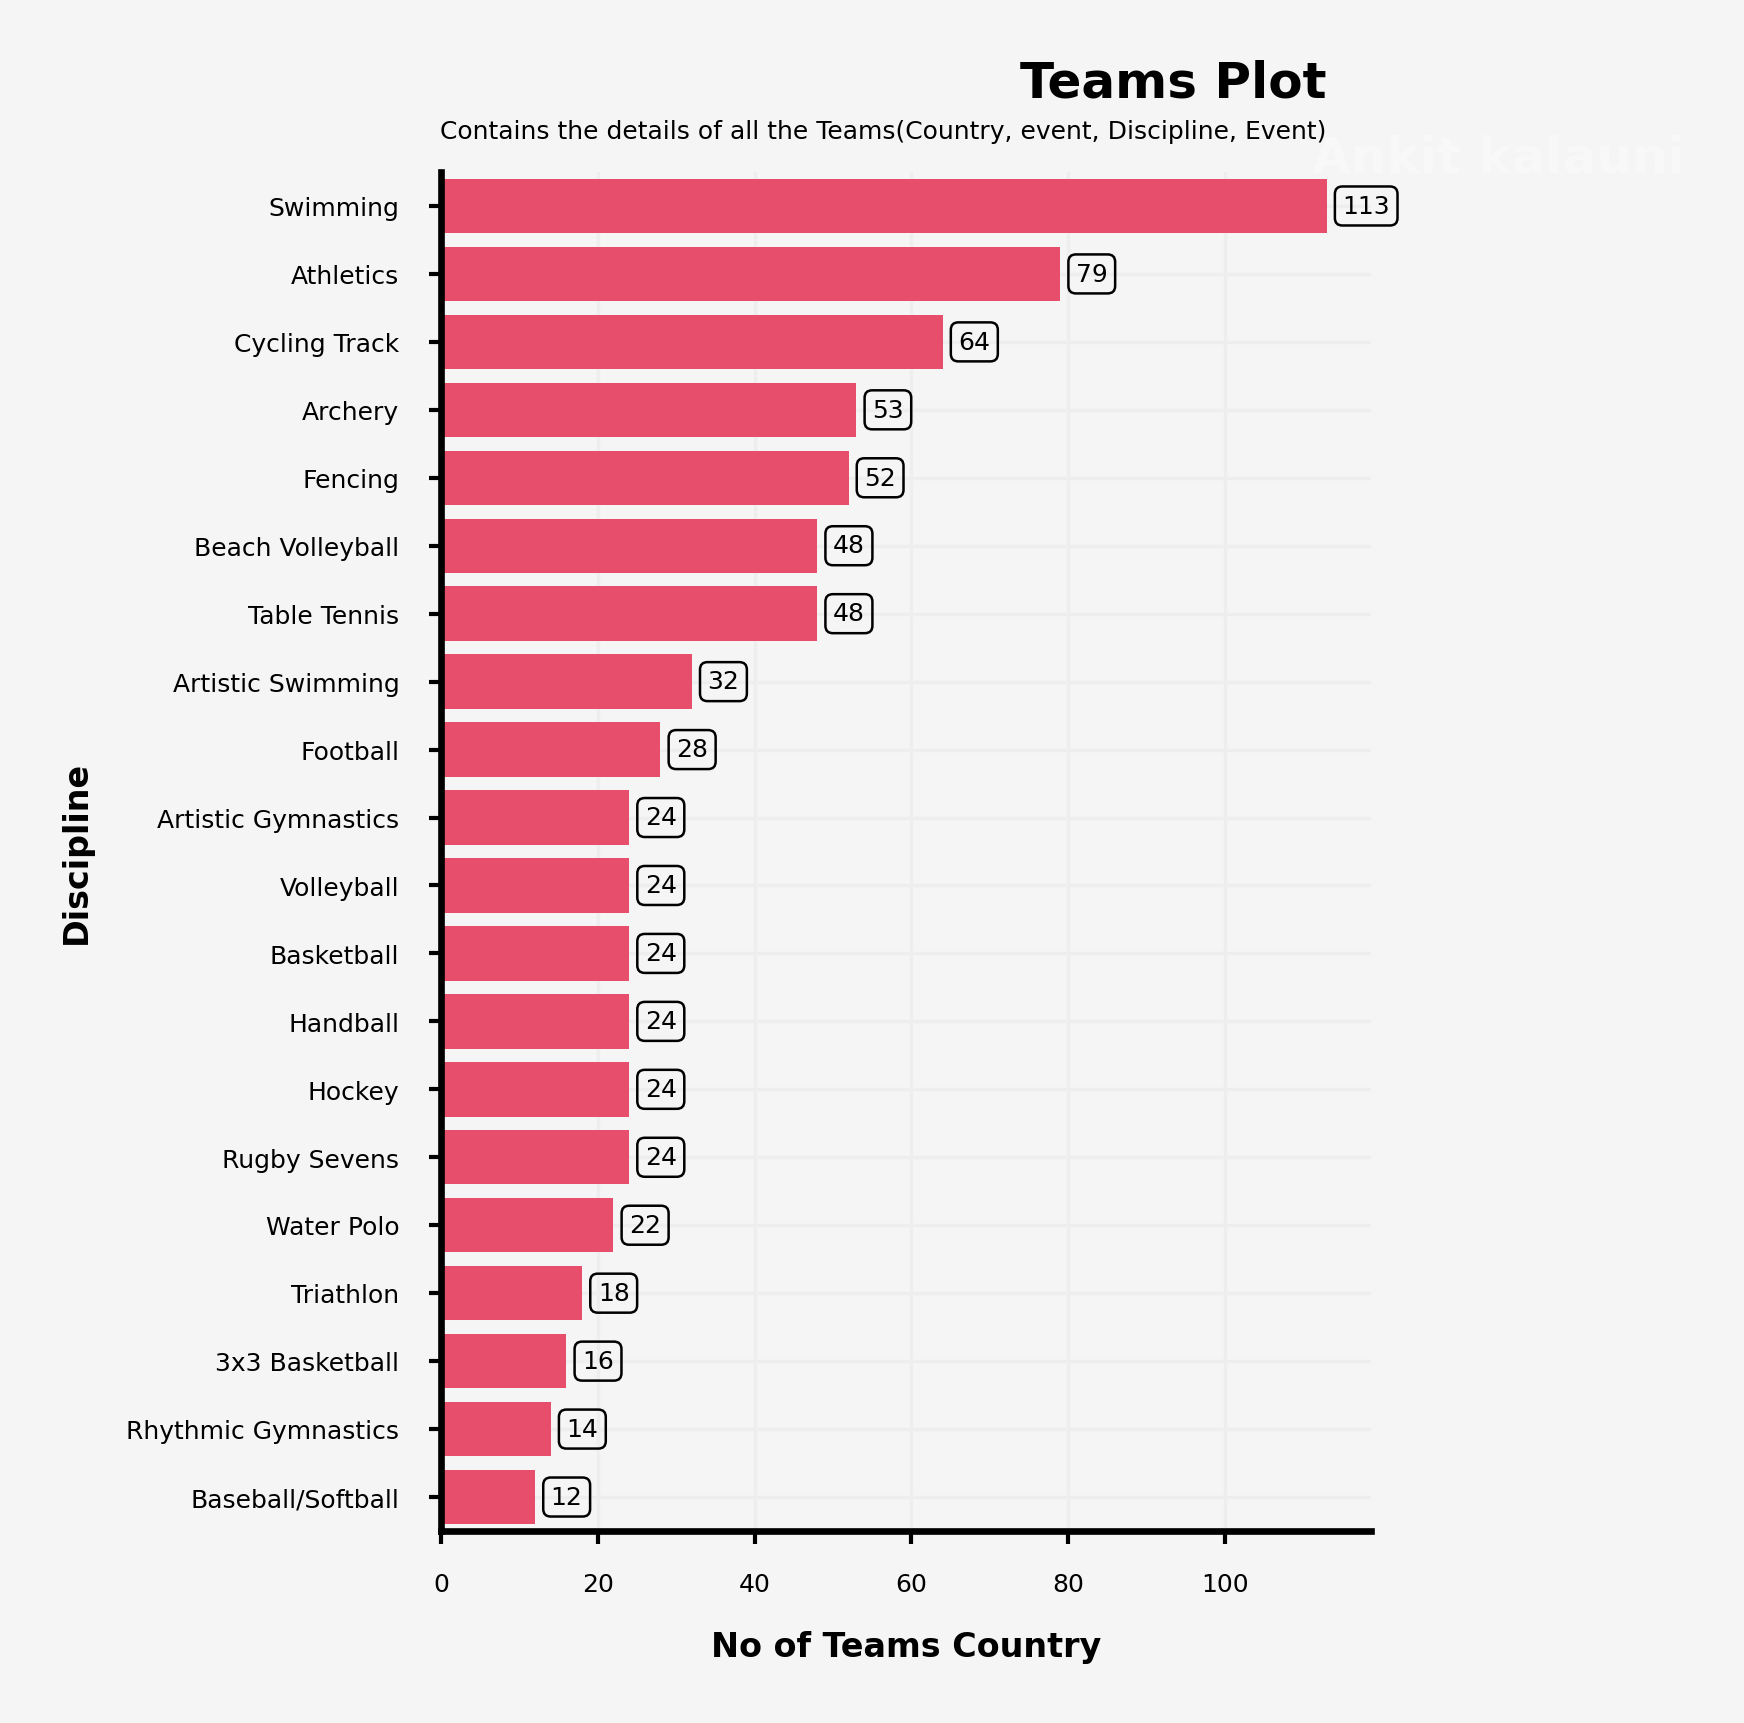

In [6]:
# teams.head(20)
teams.describe().T 
teams.info()

y = teams.Discipline.value_counts().index
x = teams.Discipline.value_counts().values

# Teams barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=teams,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Teams Country',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(['Country Count'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.035), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Teams Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(158.65,Yend, f'Ankit kalauni',alpha=0.3, fontsize=6, weight='bold',ha='right',color='w') #ignore this line if you reading this


ax0_sns.text(113,-1.6, f'Teams Plot', fontsize=6, weight='bold',ha='right')
ax0.text(113,-1,f'Contains the details of all the Teams(Country, event, Discipline, Event)',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# **4. Medals EDA**
**Medals Ranking as on 29th July 2021:**

1. United States of America - `39 Gold, 41 Silver, 33 Bronze`
2. People's Republic of China - `38 Gold, 32 Silver, 18 Bronze`
3. Japan - `27 Gold, 14 Silver, 17 Bronze`

48. India - `1 Gold, 2 Silver, 4 Bronze`


<a id='4'></a>
* [Jump top](#0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 92 to 0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.8+ KB


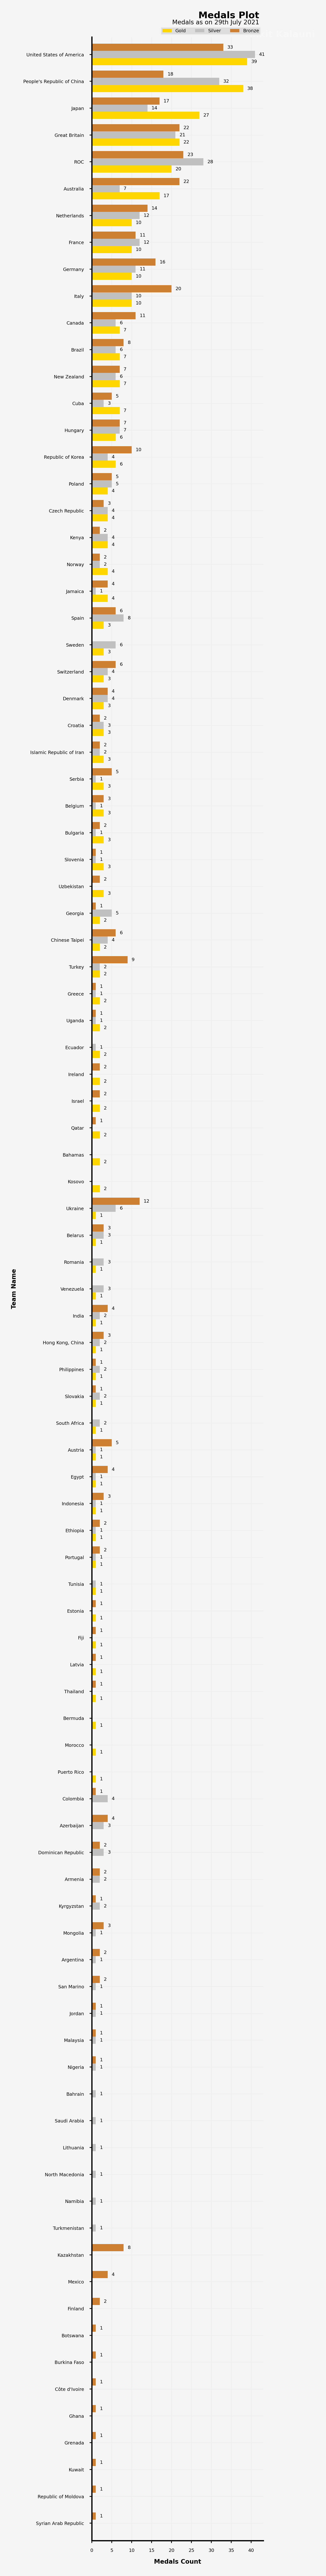

In [7]:
medals.head(10)

medals = medals.sort_index(ascending=False)

medals.describe()

medals.info()

# Medals barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,30), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#FFD700','#C0C0C0','#CD7F32'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = medals.plot(x='Team/NOC',y=['Gold','Silver','Bronze'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Medals Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Team Name',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Gold', 'Silver','Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.005), loc='upper right')

for p in ax0_sns.patches:
        value = f'{p.get_width():.0f}'
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=3)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend-1, Yend+0.71, f'Medals Plot', fontsize=6, weight='bold',ha='right')
ax0.text(Xend-1, Yend+0.48,f'Medals as on 29th July 2021',fontsize=4,ha='right')
ax0_sns.text(Xend+13,Yend, f'Ankit Kalauni',alpha=0.3, fontsize=6, weight='bold',ha='right',color='w') #ignore this line if you reading this

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# **5. Work in progress**

<a id='5'></a>
* [Jump top](#0)

<div style="color:black; display:fill; border-radius:5px;background-color:#ffd514;font-size:160%;font-family:sans-serif;letter-spacing:0.5px">If you like the work please upvote (ᕗ ͡👁 ͜ʖ ͡👁)ᕗ</div>